<a href="https://colab.research.google.com/github/nkljukin/Python-train/blob/main/iris_tree_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
from sklearn import tree
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from IPython.display import SVG
from graphviz import Source
from IPython.display import display
from IPython.display import HTML
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [2]:
style = "<style>svg{width:70% !important;heigth:70% !important;}<style>"
HTML(style)

In [3]:
data = pd.read_csv("https://stepik.org/media/attachments/course/4852/train_iris.csv")

In [4]:
data_test = pd.read_csv("https://stepik.org/media/attachments/course/4852/test_iris.csv")

In [27]:
rs = np.random.seed(0)

In [15]:
data.isnull().sum() # пропущенные значения
data_test.isnull().sum() # пропущенные значения

Unnamed: 0      0
sepal length    0
sepal width     0
petal length    0
petal width     0
species         0
dtype: int64

In [7]:
data.head()

,Unnamed: 0,sepal length,sepal width,petal length,petal width,species
0,130,7.4,2.8,6.1,1.9,2
1,7,5.0,3.4,1.5,0.2,0
2,11,4.8,3.4,1.6,0.2,0
3,142,5.8,2.7,5.1,1.9,2
4,109,7.2,3.6,6.1,2.5,2


In [22]:
X_train = data[['sepal length',	'sepal width',	'petal length',	'petal width']]
y_train = data.species
X_test = data_test[['sepal length',	'sepal width',	'petal length',	'petal width']]
y_test = data_test.species

In [23]:
max_depth_values = range(1, 100)
scores_data = pd.DataFrame()

In [28]:
for max_depth in max_depth_values:
    clf = tree.DecisionTreeClassifier(criterion = 'entropy', max_depth = max_depth, random_state=rs)
    clf.fit(X_train, y_train)
    train_score = clf.score(X_train, y_train)
    test_score = clf.score(X_test, y_test)

    temp_score_data = pd.DataFrame({'max_depth': [max_depth], 
                                    'train_score': [train_score], 
                                    'test_score': [test_score]})
    scores_data = scores_data.append(temp_score_data)

In [29]:
scores_data.head()

,max_depth,train_score,test_score
0,1,0.70,0.60
0,2,0.97,0.94
0,3,0.99,0.94
0,4,1.00,0.92
0,5,1.00,0.92


In [30]:
scores_data_long = pd.melt(scores_data, id_vars = ['max_depth'], value_vars = ['train_score',	'test_score'],
                           var_name = 'set_type', value_name = 'score')

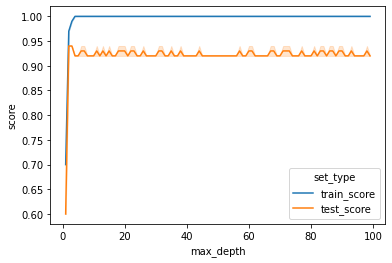

In [31]:
sns.lineplot(x = 'max_depth', y = 'score', hue = 'set_type', data = scores_data_long)